### Should we get a mortgage?
- I've run some financial simulations to help us compare buying it outright with cash versus using a mortgage (with a 25% deposit). 
- This looks at things purely from the perspective of an investor over the next 15 years.

I test three different views of the next 15 years:
1. **Balanced Outlook**
    
     **The Story**: Assumes things generally go okay – moderate property growth (avg. 3%), reasonable investment returns elsewhere (avg. 5% net), manageable inflation and future mortgage rates (avg. 4.75%).

2. **Higher Inflation / Interest Rates World**

    **The Story**: Assumes things get tougher – lower property growth (avg. 2%), higher service charge increases (avg. 4.5%), and significantly higher mortgage rates when we remortgage (avg. 6.0%). We also assume slightly lower net returns on alternative investments (avg. 4.5%).

3. **Stagnant Property / Lower Returns**
    
    **The Story**: Assumes the flat's value barely increases (avg. 1% growth) and returns on other investments are also low (avg. 3% net). Future mortgage rates are assumed moderate (avg. 4.5%). This tests the "what if everything performs poorly?" scenario.


#### Key Findings

According to these simulations (and some of my priors), using a mortgage leads to a statistically better financial outcome (more overall wealth generated) compared to buying with cash.

Why? Two Main Reasons:
1. **Opportunity Cost**: Taking a mortgage means a large chunk of cash (the amount we'd borrow) isn't tied up in the flat. The simulation assumes this freed-up cash is invested elsewhere (e.g., a mix of investments) and earns a positive return over time. This extra growth is a major benefit.

2. **Leverage (Property Growth on Borrowed Money)**: We benefit from any increase in the flat's value on the entire £550k, even though we only put down £110k of our own money initially with the mortgage.

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload

==================== SCENARIO: CASE STUDY 1: BALANCED OUTLOOK ====================

--- Running with Configuration ---
  Number of simulations: 10,000
  Property Value Initial: £580,000
  Holding Period:         15 years
  Fixed Term Length:      5 years
  Initial Mortgage Rate:  4.10%
  Deposit Percentage:     25%
  Initial Service Charge: £6,500 p.a.
  Remortgage Fee:         £1,000

Distribution Assumptions (Mean / Std Dev):
  Property Apprec.:       3.0% / 5.0%
  Alt. Investment Ret.:    5.0% / 8.0%
  Service Chg Infl.:      3.5% / 2.5%
  Remortgage Rate:       4.8% / 1.5%

--- Running 10,000 Simulations ---
Duration: 2.02 seconds

--- Processing Results ---

--- Analysis for: Case Study 1: Balanced Outlook ---

Summary Statistics:

Net Gains:
  Cash:     £98,613 (mean) ± £168,434 (std)
  Mortgage: £961,318 (mean) ± £326,405 (std)

Annualized ROI (%):
  Cash:     0.8% (mean) ± 1.6% (std)
  Mort

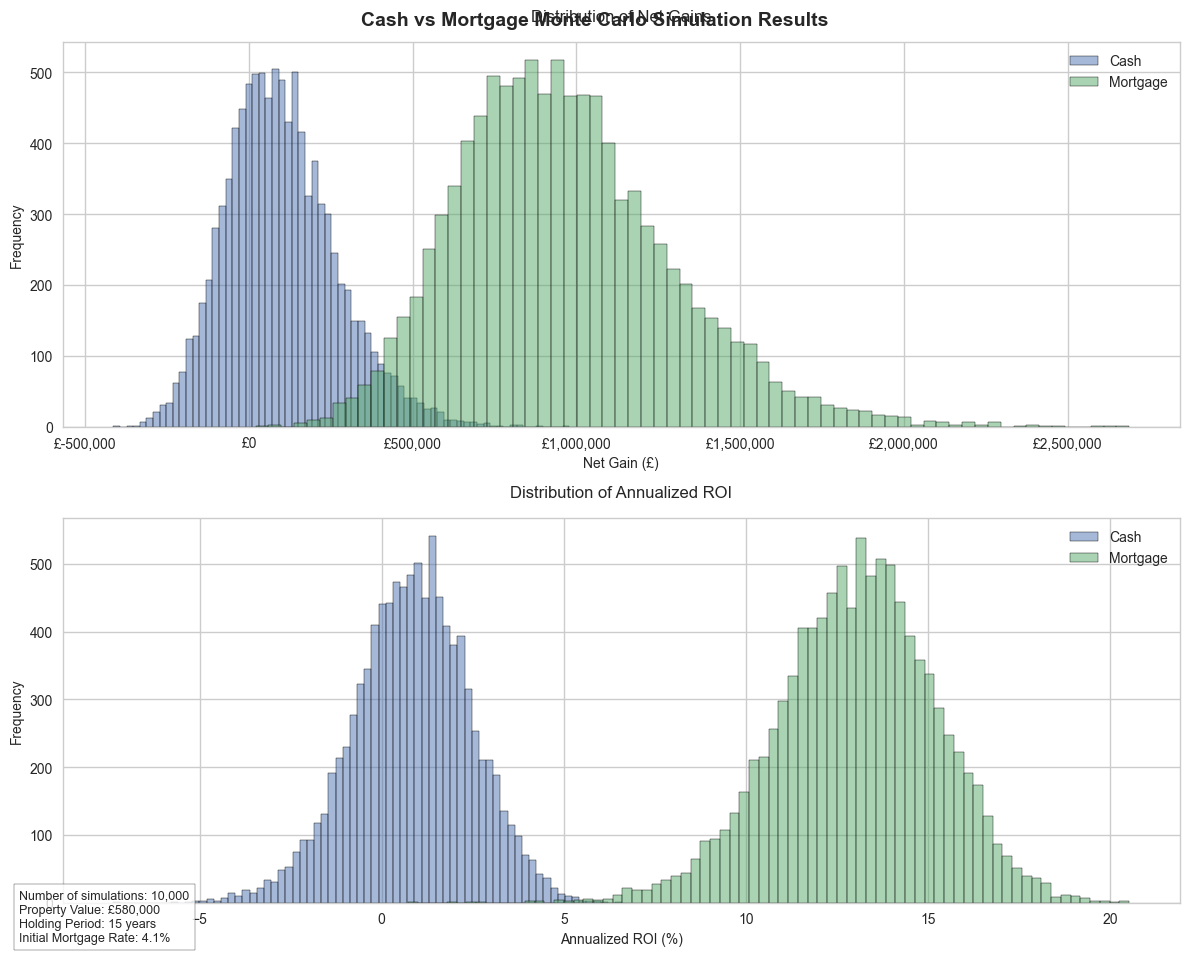

==================== END SCENARIO: CASE STUDY 1: BALANCED OUTLOOK ====================


==================== SCENARIO: CASE STUDY 2: HIGHER INFLATION/RATES WORLD ====================

--- Running with Configuration ---
  Number of simulations: 10,000
  Property Value Initial: £580,000
  Holding Period:         15 years
  Fixed Term Length:      5 years
  Initial Mortgage Rate:  4.10%
  Deposit Percentage:     25%
  Initial Service Charge: £6,500 p.a.
  Remortgage Fee:         £1,000

Distribution Assumptions (Mean / Std Dev):
  Property Apprec.:       2.0% / 5.0%
  Alt. Investment Ret.:    4.5% / 8.0%
  Service Chg Infl.:      4.5% / 3.0%
  Remortgage Rate:       6.0% / 2.0%

--- Running 10,000 Simulations ---
Duration: 2.35 seconds

--- Processing Results ---

--- Analysis for: Case Study 2: Higher Inflation/Rates World ---

Summary Statistics:

Net Gains:
  Cash:     £-34,610 (mean) ± £146,739 (std)
  Mortgage: £711,042 (mean) ± £301,769 (std)

Annualized ROI (%):
  Cash:     -0.6% 

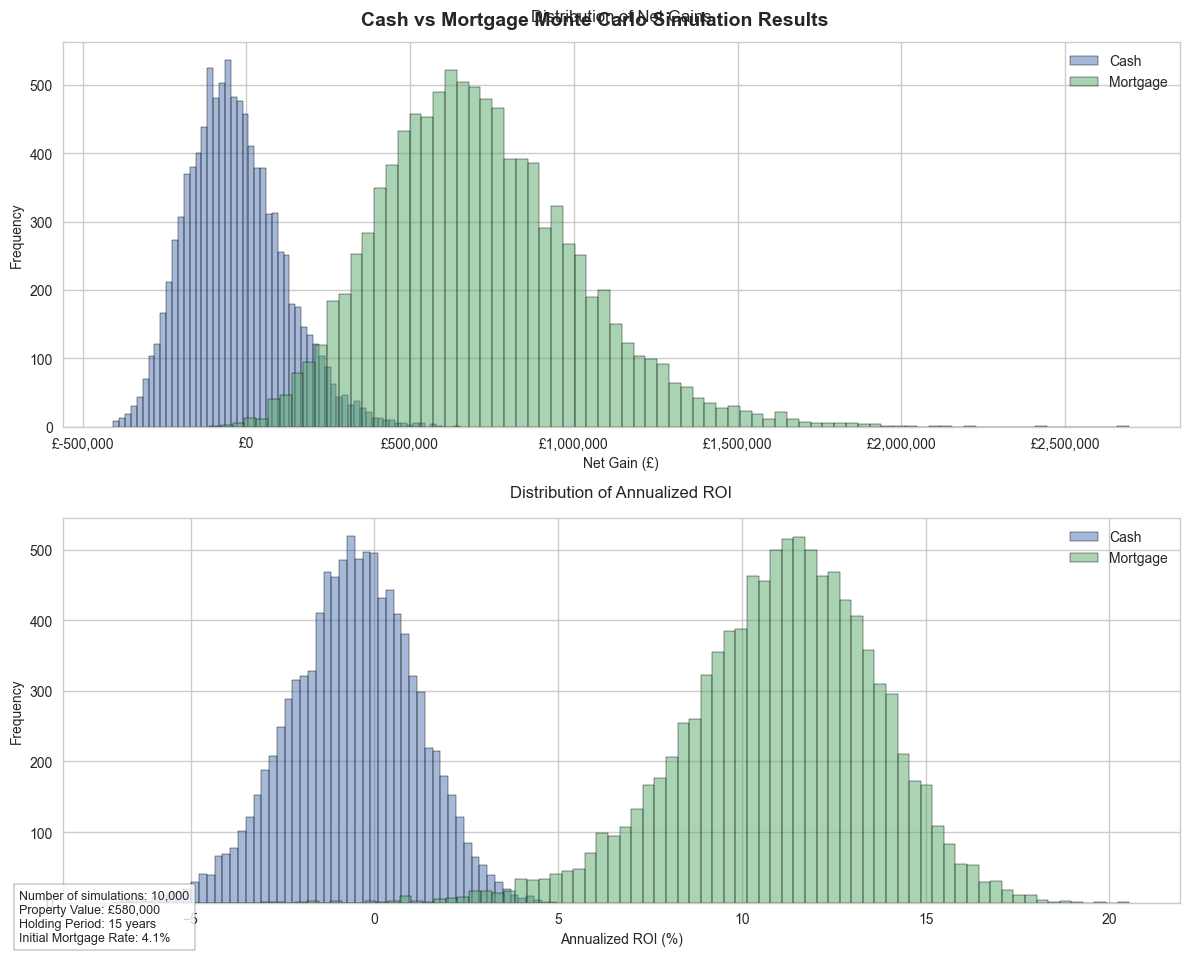

==================== END SCENARIO: CASE STUDY 2: HIGHER INFLATION/RATES WORLD ====================


==================== SCENARIO: CASE STUDY 3: STAGNANT PROPERTY / LOWER RETURNS ====================

--- Running with Configuration ---
  Number of simulations: 10,000
  Property Value Initial: £580,000
  Holding Period:         15 years
  Fixed Term Length:      5 years
  Initial Mortgage Rate:  4.10%
  Deposit Percentage:     25%
  Initial Service Charge: £6,500 p.a.
  Remortgage Fee:         £1,000

Distribution Assumptions (Mean / Std Dev):
  Property Apprec.:       1.0% / 4.0%
  Alt. Investment Ret.:    3.0% / 5.0%
  Service Chg Infl.:      3.0% / 2.5%
  Remortgage Rate:       4.5% / 1.5%

--- Running 10,000 Simulations ---
Duration: 1.92 seconds

--- Processing Results ---

--- Analysis for: Case Study 3: Stagnant Property / Lower Returns ---

Summary Statistics:

Net Gains:
  Cash:     £-122,351 (mean) ± £102,212 (std)
  Mortgage: £524,637 (mean) ± £168,506 (std)

Annualized ROI 

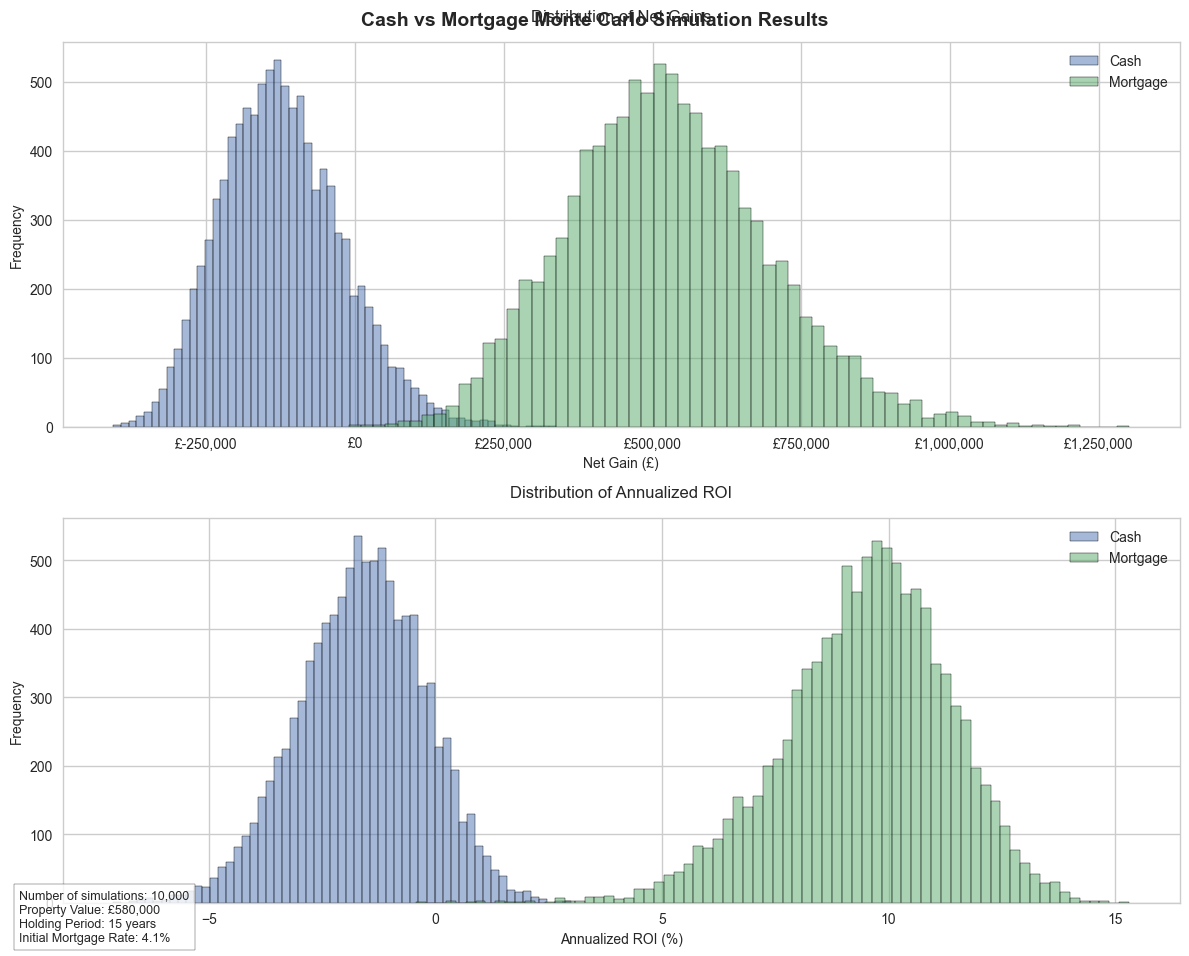

==================== END SCENARIO: CASE STUDY 3: STAGNANT PROPERTY / LOWER RETURNS ====================


=== Scenario Comparison ===

Scenario Comparison Summary:
            Mortgage Net Gain (Mean)  Mortgage Net Gain (95% CI)  \
Scenario                                                           
Balanced                  961,317.84                    6,397.55   
High Rates                711,041.89                    5,914.67   
Stagnant                  524,636.82                    3,302.72   

            Cash Net Gain (Mean)  Cash Net Gain (95% CI)  Mortgage ROI (Mean)  \
Scenario                                                                        
Balanced               98,613.00                3,301.30                13.02   
High Rates            -34,609.85                2,876.09                11.02   
Stagnant             -122,351.32                2,003.36                 9.50   

            Mortgage ROI (95% CI)  Cash ROI (Mean)  Cash ROI (95% CI)  \
Scenario        

/Users/Joseph/repos/mortgage_stuff/scenario_analysis.py:339: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


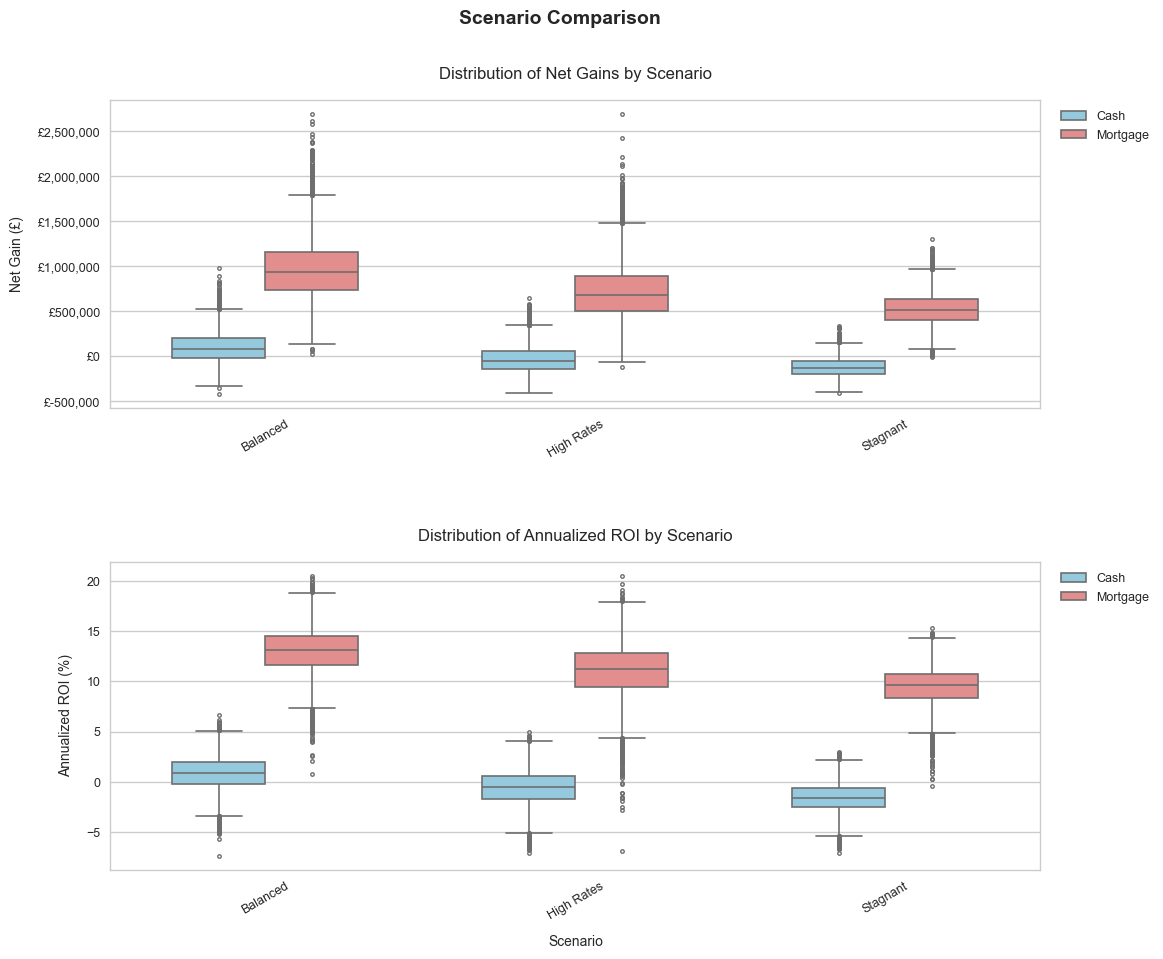

In [17]:
# --- Imports and Setup ---
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# from mortgage_mc import get_base_config, run_monte_carlo_simulation
# from mc_analysis import (
#     process_mc_results,
#     display_summary_stats,
#     display_probability_analysis,
#     plot_mc_distributions
# )
from scenario_analysis import run_and_analyze_scenario, compare_scenarios

# Dictionary to store results DataFrames
scenario_results = {}

# --- Case Study 1: Balanced Outlook ---
config1_overrides = {
    "property_value_initial": 580000.0,
    "holding_period_years": 15,
    "fixed_term_length_years": 5,
    "initial_mortgage_interest_rate_annual": 0.041 # Assumed 4.1% initial 5yr fix
}
dist1_assumptions = {
    "prop_app_mean": 0.03, "prop_app_std_dev": 0.05,
    "alt_inv_mean": 0.05, "alt_inv_std_dev": 0.08,
    "sc_inf_mean": 0.035, "sc_inf_std_dev": 0.025,
    "remort_rate_mean": 0.0475, "remort_rate_std_dev": 0.015
}
scenario_results["Balanced"] = run_and_analyze_scenario(
    "Case Study 1: Balanced Outlook",
    config1_overrides,
    dist1_assumptions
)

# --- Case Study 2: Higher Inflation/Rates World --8
config2_overrides = {
    "property_value_initial": 580000.0,
    "holding_period_years": 15,
    "fixed_term_length_years": 5, # Still aiming for 5yr fixes
    "initial_mortgage_interest_rate_annual": 0.041 # Assumed 4.1% initial 5yr fix
}
dist2_assumptions = {
    "prop_app_mean": 0.02, "prop_app_std_dev": 0.05,
    "alt_inv_mean": 0.045, "alt_inv_std_dev": 0.08,
    "sc_inf_mean": 0.045, "sc_inf_std_dev": 0.03,
    "remort_rate_mean": 0.06, "remort_rate_std_dev": 0.02
}
scenario_results["High Rates"] = run_and_analyze_scenario(
    "Case Study 2: Higher Inflation/Rates World",
    config2_overrides,
    dist2_assumptions
)

# --- Case Study 3: Stagnant Property / Lower Returns ---
config3_overrides = {
    "property_value_initial": 580000.0,
    "holding_period_years": 15,
    "fixed_term_length_years": 5,
    "initial_mortgage_interest_rate_annual": 0.041 # Assumed 4.1% initial 5yr fix
}
dist3_assumptions = {
    "prop_app_mean": 0.01, "prop_app_std_dev": 0.04,
    "alt_inv_mean": 0.03, "alt_inv_std_dev": 0.05,
    "sc_inf_mean": 0.03, "sc_inf_std_dev": 0.025,
    "remort_rate_mean": 0.045, "remort_rate_std_dev": 0.015
}
scenario_results["Stagnant"] = run_and_analyze_scenario(
    "Case Study 3: Stagnant Property / Lower Returns",
    config3_overrides,
    dist3_assumptions
)

# Compare scenarios
compare_scenarios(scenario_results)